# Lab03: Logistic Regression.

- Student ID: 18127046
- Student name: Lư Ngọc Liên

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

### Load data

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - that is the average value of a pixel in an image for the different digits

In [4]:
labels=np.unique(y)
# print(labels)
n_label=np.unique(y).shape[0]
l_means=np.zeros(shape=n_label,dtype=float) #array stores average intensity for each label
#TODO compute average intensity for each label

#to compute to mean of each row (each picture)
pic_mean = np.mean(X, axis = 1)

#np.where (get index of element in y where has the same value as label)
#then compute average intensity for each label
for i in range(n_label):
    l_means[i] = np.mean(pic_mean [np.where (y == str(i))])

print(l_means)

[44.17740512 19.40680177 38.03420776 36.15420938 30.99599983 32.95015873
 35.23486491 29.21798737 38.39790125 31.35940809]


Plot the average intensity using matplotlib

<BarContainer object of 10 artists>

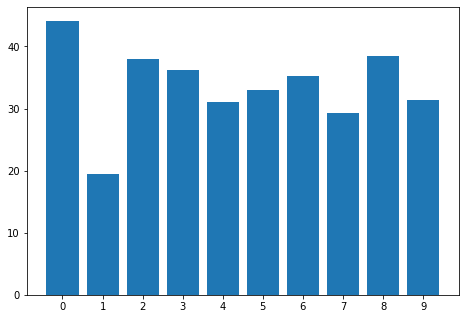

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means)

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [6]:
#TODO compute average intensity for each data sample
intensity = pic_mean
print(intensity.shape) 

(70000,)


Sometimes people really do not know what are they doing. I am not an exception:

In [7]:
X_flip=np.flip(X)
symmetry= np.mean((X-X_flip),axis=1)
print(symmetry.shape)

(70000,)


I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this thing works.

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [8]:
#TODO create X_new by horizontal stack intensity and symmetry
X_new = np.vstack((intensity, symmetry)).T
print(X_new.shape) #it should be (70000,2)

(70000, 2)


## 2. Training 

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
- **TODO: Study about Z-score normalization** 
<ul>
    <li>Z-score normalization is one of the way to avoids outlier issue.</li>
    <li>Formula for Z-score is: </li>
    $$ \frac{value -\mu }{\sigma}$$ 
    Here $\mu$ is mean value of the feature and $\sigma$ is the standard deviation. 
    <li>If the scale is equal 0, the value equal to mean value of the feature.</li>
    <li>If the scale is greater than 0, the value is greater than the mean of the feature.</li>
    <li>If the scale is lower than 0, the value is lower than the mean of the feature.</li>
    <li>So we can say "Z-score handle outlier very well but not normalized data with the exact same scale" [1].</li> 
</ul>

- **TODO: Why should we normalize data?**
<ul>
    <li>To delect outlier.</li>
    <li>To change the values of the column to the common scale.</li>
    <li>To get the better result.</li>
</ul>
[1]https://www.codecademy.com/articles/normalization


In [9]:
#TODO: normalize X_new
standard_deviation = np.std(X_new,axis = 0)
avg_X = np.mean(X_new, axis = 0) 
X_new =  (X_new- avg_X) / standard_deviation

### Construct  data

In [10]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual
y_new=y.astype(int)
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
y_new=y_new.reshape(-1,1)
print (X_new.shape)
print (y_new.shape)

(70000, 3)
(70000, 1)


### Split data 

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 3)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [12]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

### Compute output

In [13]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    return sigmoid_activation(X.dot(W))
def predict(W, X):
 
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #........
    preds=sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

### Compute gradient

**Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [14]:
def compute_gradient(train_X, error):
    """
    This is the gradient descent update of "average negative loglikelihood" loss function. 
    In lab02 our loss function is "sum squared error".
    """
    #TODO
    gradient = (train_X.T @ error)/len(train_X)
    return gradient

In [15]:
def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))
        losses.append(loss)
        gradient=compute_gradient(train_X, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0): print ('Epoch %d, loss %.3f' %(epoch+1, loss))
        
    return W

### Train our model

In [16]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

Epoch 1000, loss 0.298
Epoch 2000, loss 0.242
Epoch 3000, loss 0.226
Epoch 4000, loss 0.218
Epoch 5000, loss 0.214
Epoch 6000, loss 0.211
Epoch 7000, loss 0.209
Epoch 8000, loss 0.207
Epoch 9000, loss 0.206
Epoch 10000, loss 0.205
Epoch 11000, loss 0.204
Epoch 12000, loss 0.203
Epoch 13000, loss 0.203
Epoch 14000, loss 0.202
Epoch 15000, loss 0.202
Epoch 16000, loss 0.202
Epoch 17000, loss 0.201
Epoch 18000, loss 0.201
Epoch 19000, loss 0.201
Epoch 20000, loss 0.201
Epoch 21000, loss 0.201
Epoch 22000, loss 0.201
Epoch 23000, loss 0.201
Epoch 24000, loss 0.200
Epoch 25000, loss 0.200
Epoch 26000, loss 0.200
Epoch 27000, loss 0.200
Epoch 28000, loss 0.200
Epoch 29000, loss 0.200
Epoch 30000, loss 0.200
Epoch 31000, loss 0.200
Epoch 32000, loss 0.200
Epoch 33000, loss 0.200
Epoch 34000, loss 0.200
Epoch 35000, loss 0.200
Epoch 36000, loss 0.200
Epoch 37000, loss 0.200
Epoch 38000, loss 0.200
Epoch 39000, loss 0.200
Epoch 40000, loss 0.200
Train err of final w:  8.121370561638845


## 3. Evaluate our model

In [17]:
preds = predict(W, train_X)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     41376
           1       0.71      0.47      0.57      5291

    accuracy                           0.92     46667
   macro avg       0.82      0.72      0.76     46667
weighted avg       0.91      0.92      0.91     46667



In [18]:
preds = predict(W, test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     20747
           1       0.70      0.48      0.57      2586

    accuracy                           0.92     23333
   macro avg       0.82      0.73      0.76     23333
weighted avg       0.91      0.92      0.91     23333



**TODO: Comment on the result**

- The accuracy in data training and data test is the same (92%).
- F1-score in data training and data test is the same (0.96 for 0 and 0.57 for 1)
- Precision and recall value is different in data training and data test.
<ul>
    <li>In data training precision for 1 is 0.71, data test is 0.70 </li>
    <li>In datat training recall for 1 is 0.47, data test is 0.48 </li>
    <li>In datat training recall for 0 is 0.98, data test is 0.97 </li> 
    
</ul>
- We can see that F1-score for 1 is so small (because the number of sample for 0 and 1 has the big different). But it is still has high accuracy.
  
- Support for sample 1 and 0 has the big gap. "Inbalanced support in the training data may indiate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing." [2]

[2] https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
